# **File ipynb for classification**

**11/08/2023** -  Progetto Hand Robot Team EEG - Andrea Scarpellini, Sara Paratico (if you are modifying this file please write here your name)

This file contains a supervised classification analysis on data collected in 2022. We utilized labeled data collected by Davide and applied various algorithms for the supervised classification.


### **JSON FILES:**
We have 22 file called in the following way.
 - POW000.json

  ...

 - POW021.json

#### **Description**
- "000": An identifier for a reading session.
- "UserID": User identifier, in this case, "M28".
- "Readings": Contains the reading data collected during the session.
- "000000": A key for a specific reading during the session.
- "Phase": The phase of the recording
  - Baseline 000
  - Baseline Occhi Chiusi
  - Sudoku
  - SPIEGARE LE ALTRE
- "Time": The timestamp of the reading, for example, "12:43:49".
- "AF3", "T7", "Pz", "T8", "AF4": Electrode positions on the scalp.
- "Theta", "Alpha", "BetaL", "BetaH", "Gamma": Power for brain waves in their respective frequency bands.


### **What we use**
We use only the data relative to the channels and the label relative to the phase. With those data we should be able to create a model that can desciminate the phases thanks to the values of pow.


- What are the phases that we are interested  in? --> why?
- How much file we should use for training ?
- for testing?
- for validation?



### **Sub-Objective:**
Can we distinguish between different phases?

Questions:

- Which electrodes carry the most significant weight in the data?

- Why are these electrodes crucial?
- What frequency bands exhibit the greatest influence in the dataset?

- Why are these frequency bands noteworthy?
- Which task is most effective in eliciting concentration from the subject?

- Why is this particular task considered optimal?
- Considering a potential user experience, which analyzed task is the most    suitable choice for triggering the robotic arm?
Explanation: What specific action does the subject need to perform to activate the robotic arm, based on our analysis?






In [2]:
import json 
import os
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

import math 
import numpy as np

In [3]:
# Get the current directory (where your Python script is located)
current_directory = os.path.dirname('ML_POW_')

# Initialize an empty list to store the rows
rows = []

# Iterate through all the JSON files in the specified range
for i in range(0, 22):
    # Generate the file name (assuming the format is POWxxx.json)
    json_file_name = f'POW{i:03d}.json'
    json_file_path = os.path.join(current_directory, 'DB_Macchinine', json_file_name)

    # Check if the file exists before attempting to read it
    if os.path.exists(json_file_path):
        with open(json_file_path, 'r') as json_file:
            data = json.load(json_file)

        # Iterate through the JSON data
        for key, value in data.items():
            user_id = value['UserID']
            readings = value['Readings']
            for reading_key, reading_value in readings.items():
                phase = reading_value['Phase']
                if phase in ["sudoku", "baseline occhi chiusi"]:
                    time = reading_value['Time']
                    af3_theta = reading_value['AF3']['Theta']
                    af3_alpha = reading_value['AF3']['Alpha']
                    af3_betaL = reading_value['AF3']['BetaL']
                    af3_betaH = reading_value['AF3']['BetaH']
                    af3_gamma = reading_value['AF3']['Gamma']

                    t7_theta = reading_value['T7']['Theta']
                    t7_alpha = reading_value['T7']['Alpha']
                    t7_betaL = reading_value['T7']['BetaL']
                    t7_betaH = reading_value['T7']['BetaH']
                    t7_gamma = reading_value['T7']['Gamma']

                    pz_theta = reading_value['Pz']['Theta']
                    pz_alpha = reading_value['Pz']['Alpha']
                    pz_betaL = reading_value['Pz']['BetaL']
                    pz_betaH = reading_value['Pz']['BetaH']
                    pz_gamma = reading_value['Pz']['Gamma']

                    t8_theta = reading_value['T8']['Theta']
                    t8_alpha = reading_value['T8']['Alpha']
                    t8_betaL = reading_value['T8']['BetaL']
                    t8_betaH = reading_value['T8']['BetaH']
                    t8_gamma = reading_value['T8']['Gamma']

                    af4_theta = reading_value['AF4']['Theta']
                    af4_alpha = reading_value['AF4']['Alpha']
                    af4_betaL = reading_value['AF4']['BetaL']
                    af4_betaH = reading_value['AF4']['BetaH']
                    af4_gamma = reading_value['AF4']['Gamma']


                    row = [user_id, phase, time, af3_theta, af3_alpha, af3_betaL, af3_betaH, af3_gamma, t7_theta, t7_alpha, t7_betaL, t7_betaH, t7_gamma,
                           pz_theta, pz_alpha, pz_betaL, pz_betaH, pz_gamma, t8_theta, t8_alpha, t8_betaL, t8_betaH, t8_gamma,
                           af4_theta, af4_alpha, af4_betaL, af4_betaH, af4_gamma]

                    rows.append(row)

# Define columns as before
columns = ['UserID', 'Phase', 'Time', 'AF3_Theta', 'AF3_Alpha', 'AF3_BetaL', 'AF3_BetaH', 'AF3_Gamma', 
           'T7_Theta', 'T7_Alpha', 'T7_BetaL', 'T7_BetaH', 'T7_Gamma', 
           'Pz_Theta', 'Pz_Alpha', 'Pz_BetaL', 'Pz_BetaH', 'Pz_Gamma', 
           'T8_Theta', 'T8_Alpha', 'T8_BetaL', 'T8_BetaH', 'T8_Gamma', 
           'AF4_Theta', 'AF4_Alpha', 'AF4_BetaL', 'AF4_BetaH', 'AF4_Gamma']

# Create a DataFrame from the rows and columns
df = pd.DataFrame(rows, columns=columns)

# Filter the DataFrame to only include rows with 'Phase' as "sudoku" or "baseline occhi chiusi"
filtered_df = df[df['Phase'].isin(["sudoku", "baseline occhi chiusi"])]


In [4]:
columns_to_remove = ['UserID', 'Time']
filtered_df.drop(columns=columns_to_remove, inplace=True)
print(filtered_df.shape)
filtered_df.head()

(38279, 26)


,Phase,AF3_Theta,AF3_Alpha,AF3_BetaL,AF3_BetaH,AF3_Gamma,T7_Theta,T7_Alpha,T7_BetaL,T7_BetaH,...,T8_Theta,T8_Alpha,T8_BetaL,T8_BetaH,T8_Gamma,AF4_Theta,AF4_Alpha,AF4_BetaL,AF4_BetaH,AF4_Gamma
0,baseline occhi chiusi,2.514,4.049,6.891,3.734,2.143,3.878,3.109,4.454,3.1,...,3.368,9.275,10.638,3.768,3.033,3.03,5.133,6.916,4.916,2.152
1,baseline occhi chiusi,2.184,3.739,5.57,3.868,2.017,3.327,3.66,4.823,3.116,...,3.754,10.035,10.933,3.293,2.756,2.583,4.833,5.746,5.199,2.108
2,baseline occhi chiusi,2.03,3.471,4.345,3.931,1.849,2.814,4.142,5.099,3.022,...,4.156,10.042,10.698,2.928,2.48,2.429,4.343,4.658,5.4,2.024
3,baseline occhi chiusi,2.059,3.598,3.408,3.924,1.706,2.552,4.518,5.164,2.871,...,4.449,9.434,9.763,2.688,2.236,2.457,4.088,3.804,5.43,1.931
4,baseline occhi chiusi,2.361,4.377,2.791,3.916,1.643,2.659,4.794,4.94,2.771,...,4.548,8.518,8.255,2.589,2.066,2.977,4.451,3.207,5.29,1.858


### **Dataset Exploration**

- Balance
- Missing values
- Variable types
- Variable distributions
- Potential variable transformations
- Variable distributions separated by phase
- Possible correlation between channels

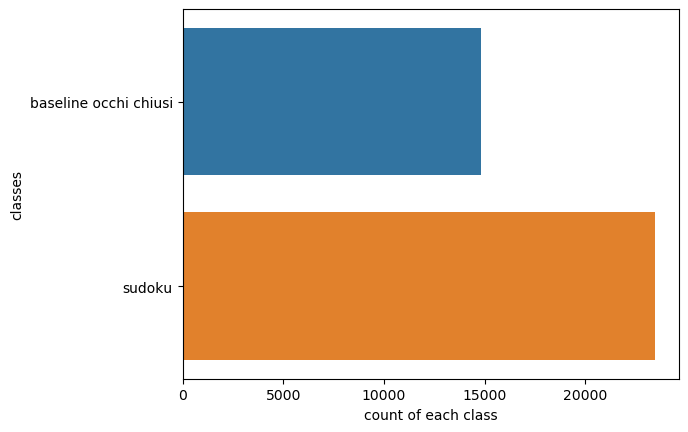

In [5]:
#Visualize Class Counts
sns.countplot(y=filtered_df.Phase ,data=filtered_df)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

The dataset is  not balanced ! Considering boostrapping or elimination of data or something else (ask to a data analyst what  we should do)

In [6]:
filtered_df.isna().any()


Phase        False
AF3_Theta    False
AF3_Alpha    False
AF3_BetaL    False
AF3_BetaH    False
AF3_Gamma    False
T7_Theta     False
T7_Alpha     False
T7_BetaL     False
T7_BetaH     False
T7_Gamma     False
Pz_Theta     False
Pz_Alpha     False
Pz_BetaL     False
Pz_BetaH     False
Pz_Gamma     False
T8_Theta     False
T8_Alpha     False
T8_BetaL     False
T8_BetaH     False
T8_Gamma     False
AF4_Theta    False
AF4_Alpha    False
AF4_BetaL    False
AF4_BetaH    False
AF4_Gamma    False
dtype: bool

In [7]:
print(filtered_df.dtypes)

Phase        object
AF3_Theta    object
AF3_Alpha    object
AF3_BetaL    object
AF3_BetaH    object
AF3_Gamma    object
T7_Theta     object
T7_Alpha     object
T7_BetaL     object
T7_BetaH     object
T7_Gamma     object
Pz_Theta     object
Pz_Alpha     object
Pz_BetaL     object
Pz_BetaH     object
Pz_Gamma     object
T8_Theta     object
T8_Alpha     object
T8_BetaL     object
T8_BetaH     object
T8_Gamma     object
AF4_Theta    object
AF4_Alpha    object
AF4_BetaL    object
AF4_BetaH    object
AF4_Gamma    object
dtype: object


We should chage from object to float the POW numbers.

In [8]:
columns_to_convert = [
    'AF3_Theta', 'AF3_Alpha', 'AF3_BetaL', 'AF3_BetaH', 'AF3_Gamma',
    'T7_Theta', 'T7_Alpha', 'T7_BetaL', 'T7_BetaH', 'T7_Gamma',
    'Pz_Theta', 'Pz_Alpha', 'Pz_BetaL', 'Pz_BetaH', 'Pz_Gamma',
    'T8_Theta', 'T8_Alpha', 'T8_BetaL', 'T8_BetaH', 'T8_Gamma',
    'AF4_Theta', 'AF4_Alpha', 'AF4_BetaL', 'AF4_BetaH', 'AF4_Gamma'
]

# Use the astype method to convert columns to float
filtered_df[columns_to_convert] = filtered_df[columns_to_convert].astype(float)

In [9]:
print(filtered_df.dtypes)

Phase         object
AF3_Theta    float64
AF3_Alpha    float64
AF3_BetaL    float64
AF3_BetaH    float64
AF3_Gamma    float64
T7_Theta     float64
T7_Alpha     float64
T7_BetaL     float64
T7_BetaH     float64
T7_Gamma     float64
Pz_Theta     float64
Pz_Alpha     float64
Pz_BetaL     float64
Pz_BetaH     float64
Pz_Gamma     float64
T8_Theta     float64
T8_Alpha     float64
T8_BetaL     float64
T8_BetaH     float64
T8_Gamma     float64
AF4_Theta    float64
AF4_Alpha    float64
AF4_BetaL    float64
AF4_BetaH    float64
AF4_Gamma    float64
dtype: object


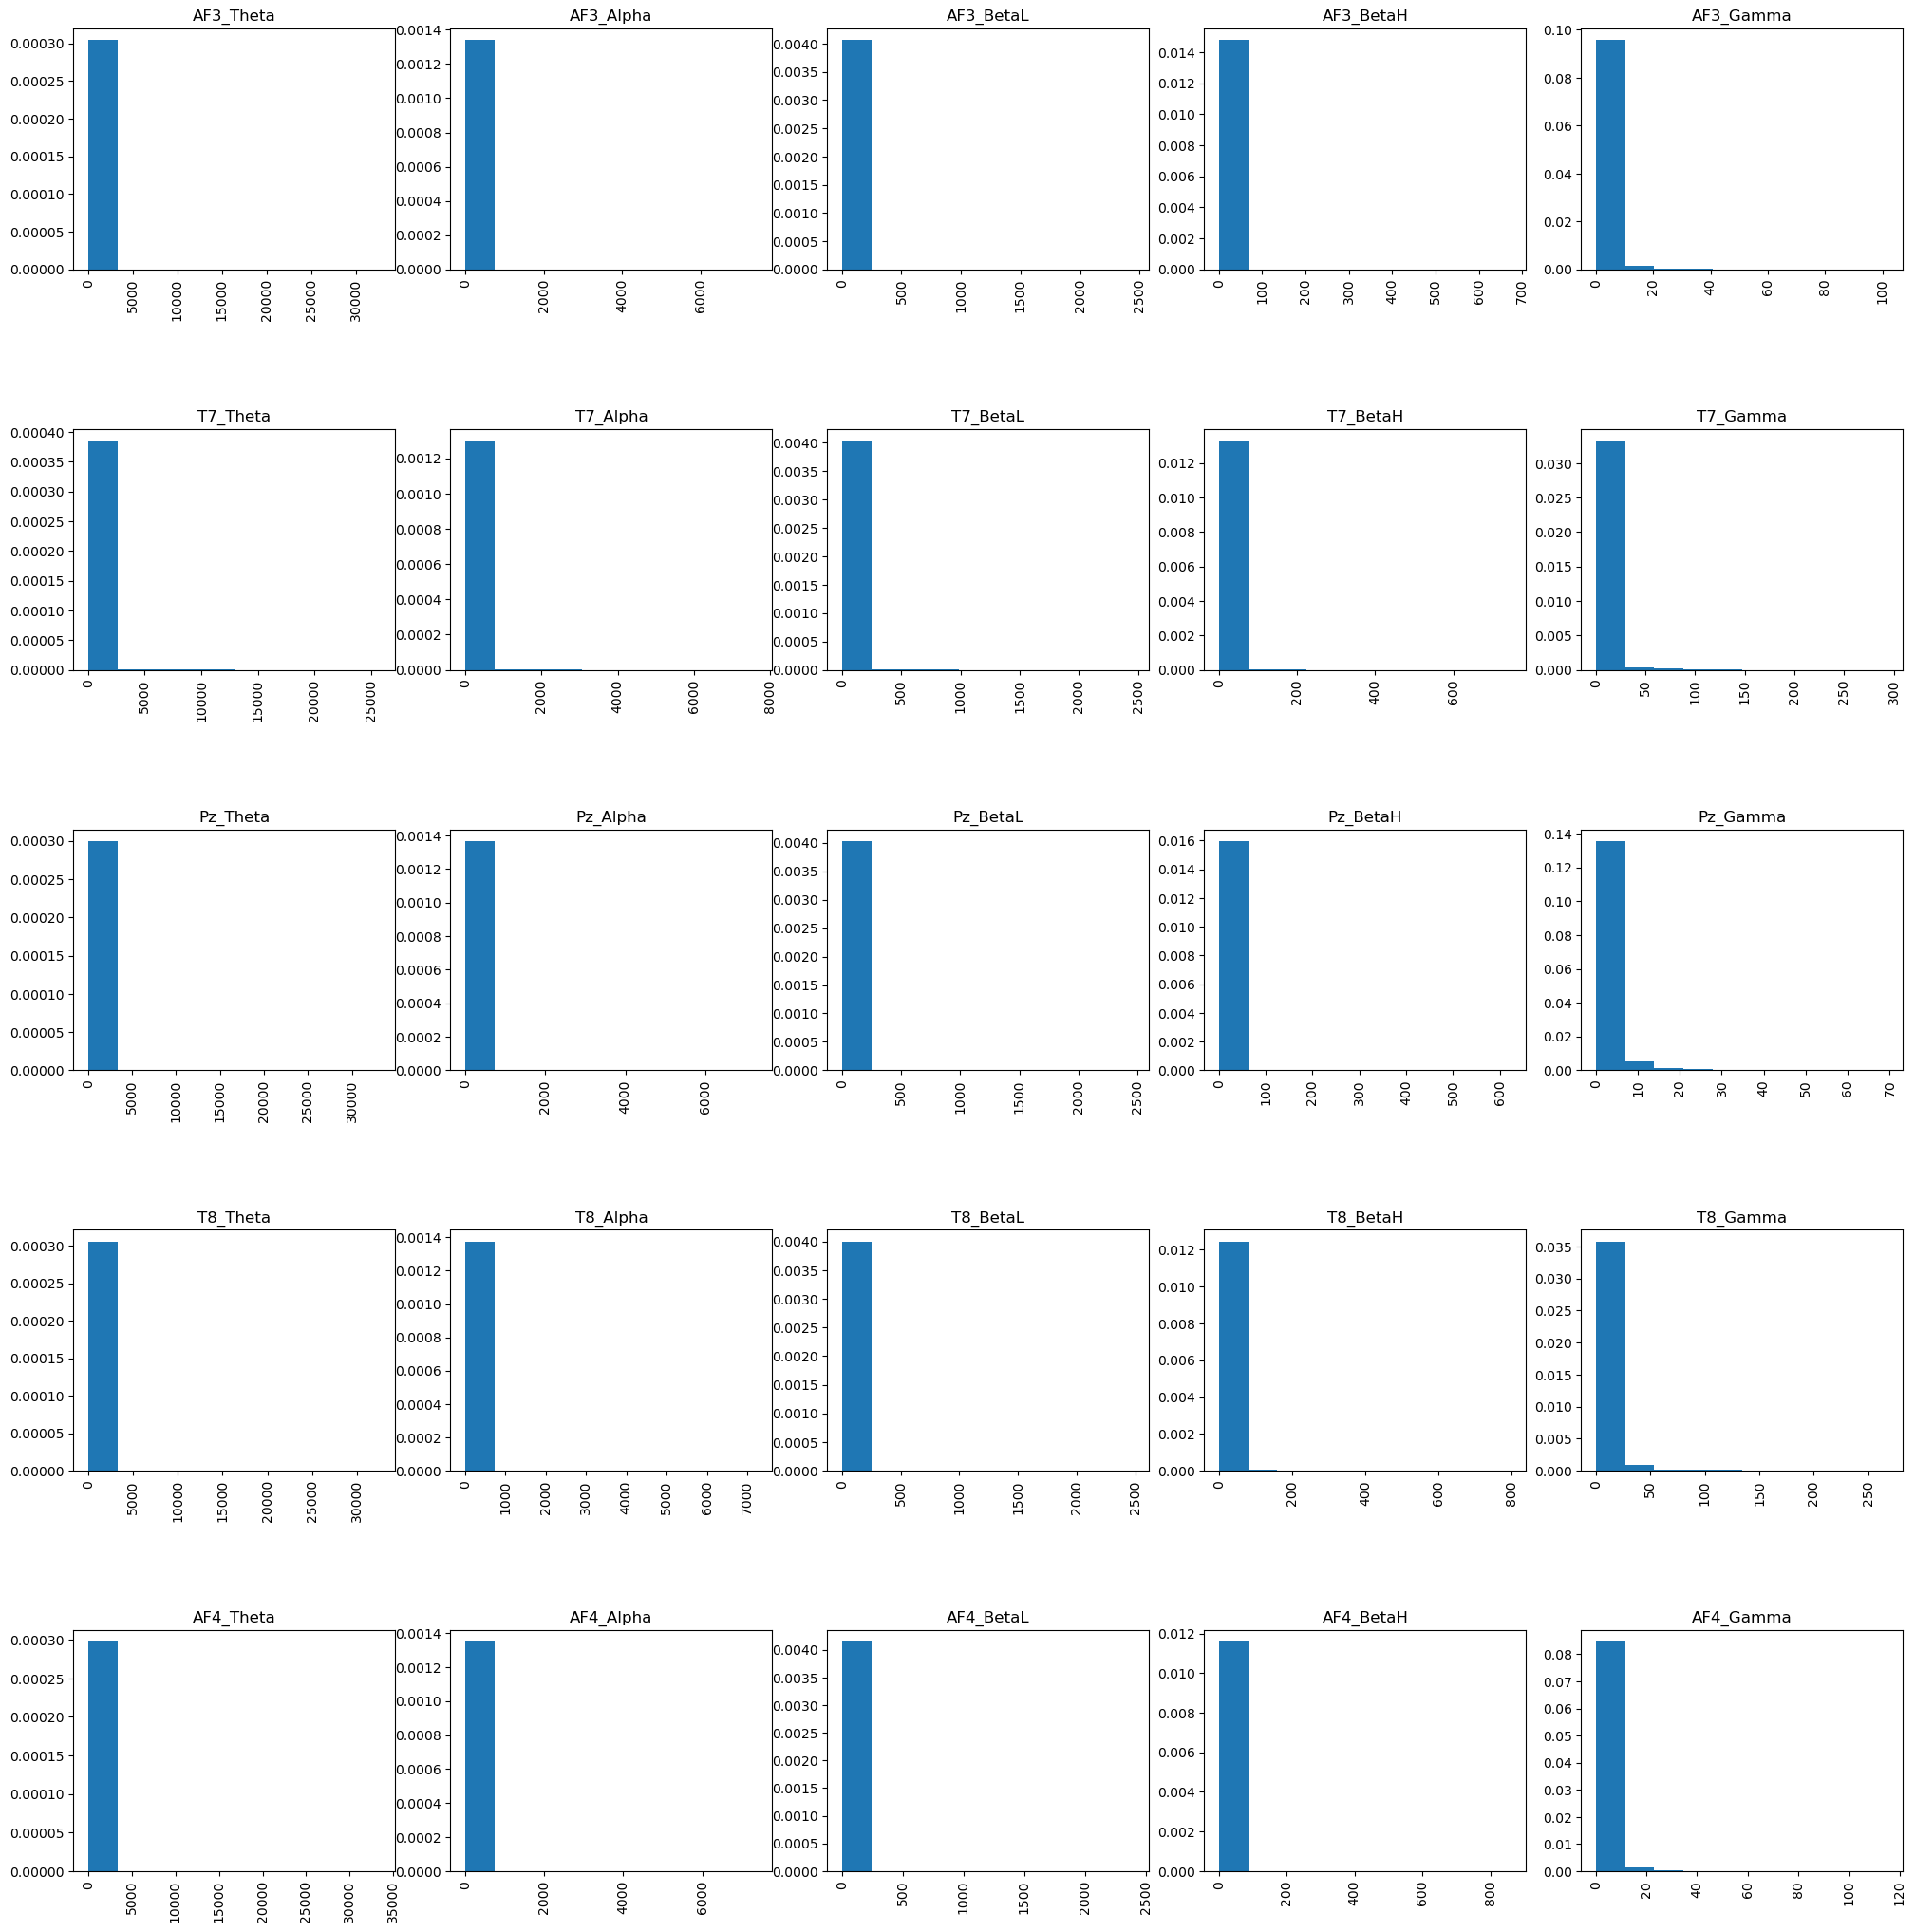

In [10]:
pow = filtered_df [columns_to_convert]

fig, axes = plt.subplots(5, 5,figsize=[20,20])
axes = axes.flatten()
fig.tight_layout(h_pad=10)

i=0
for x in pow.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist(pow[x],density=True)
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.title(x)
    i+=1
plt.show()

We would like the data to be as distributed and normal as possible. Since these data points are concentrated around zero and exhibit exponential decay, we apply a logarithm to make them more "normal."

In [11]:
pow_transformed = pow[columns_to_convert].apply(lambda x: x.apply(lambda y: math.log(y + 1)))


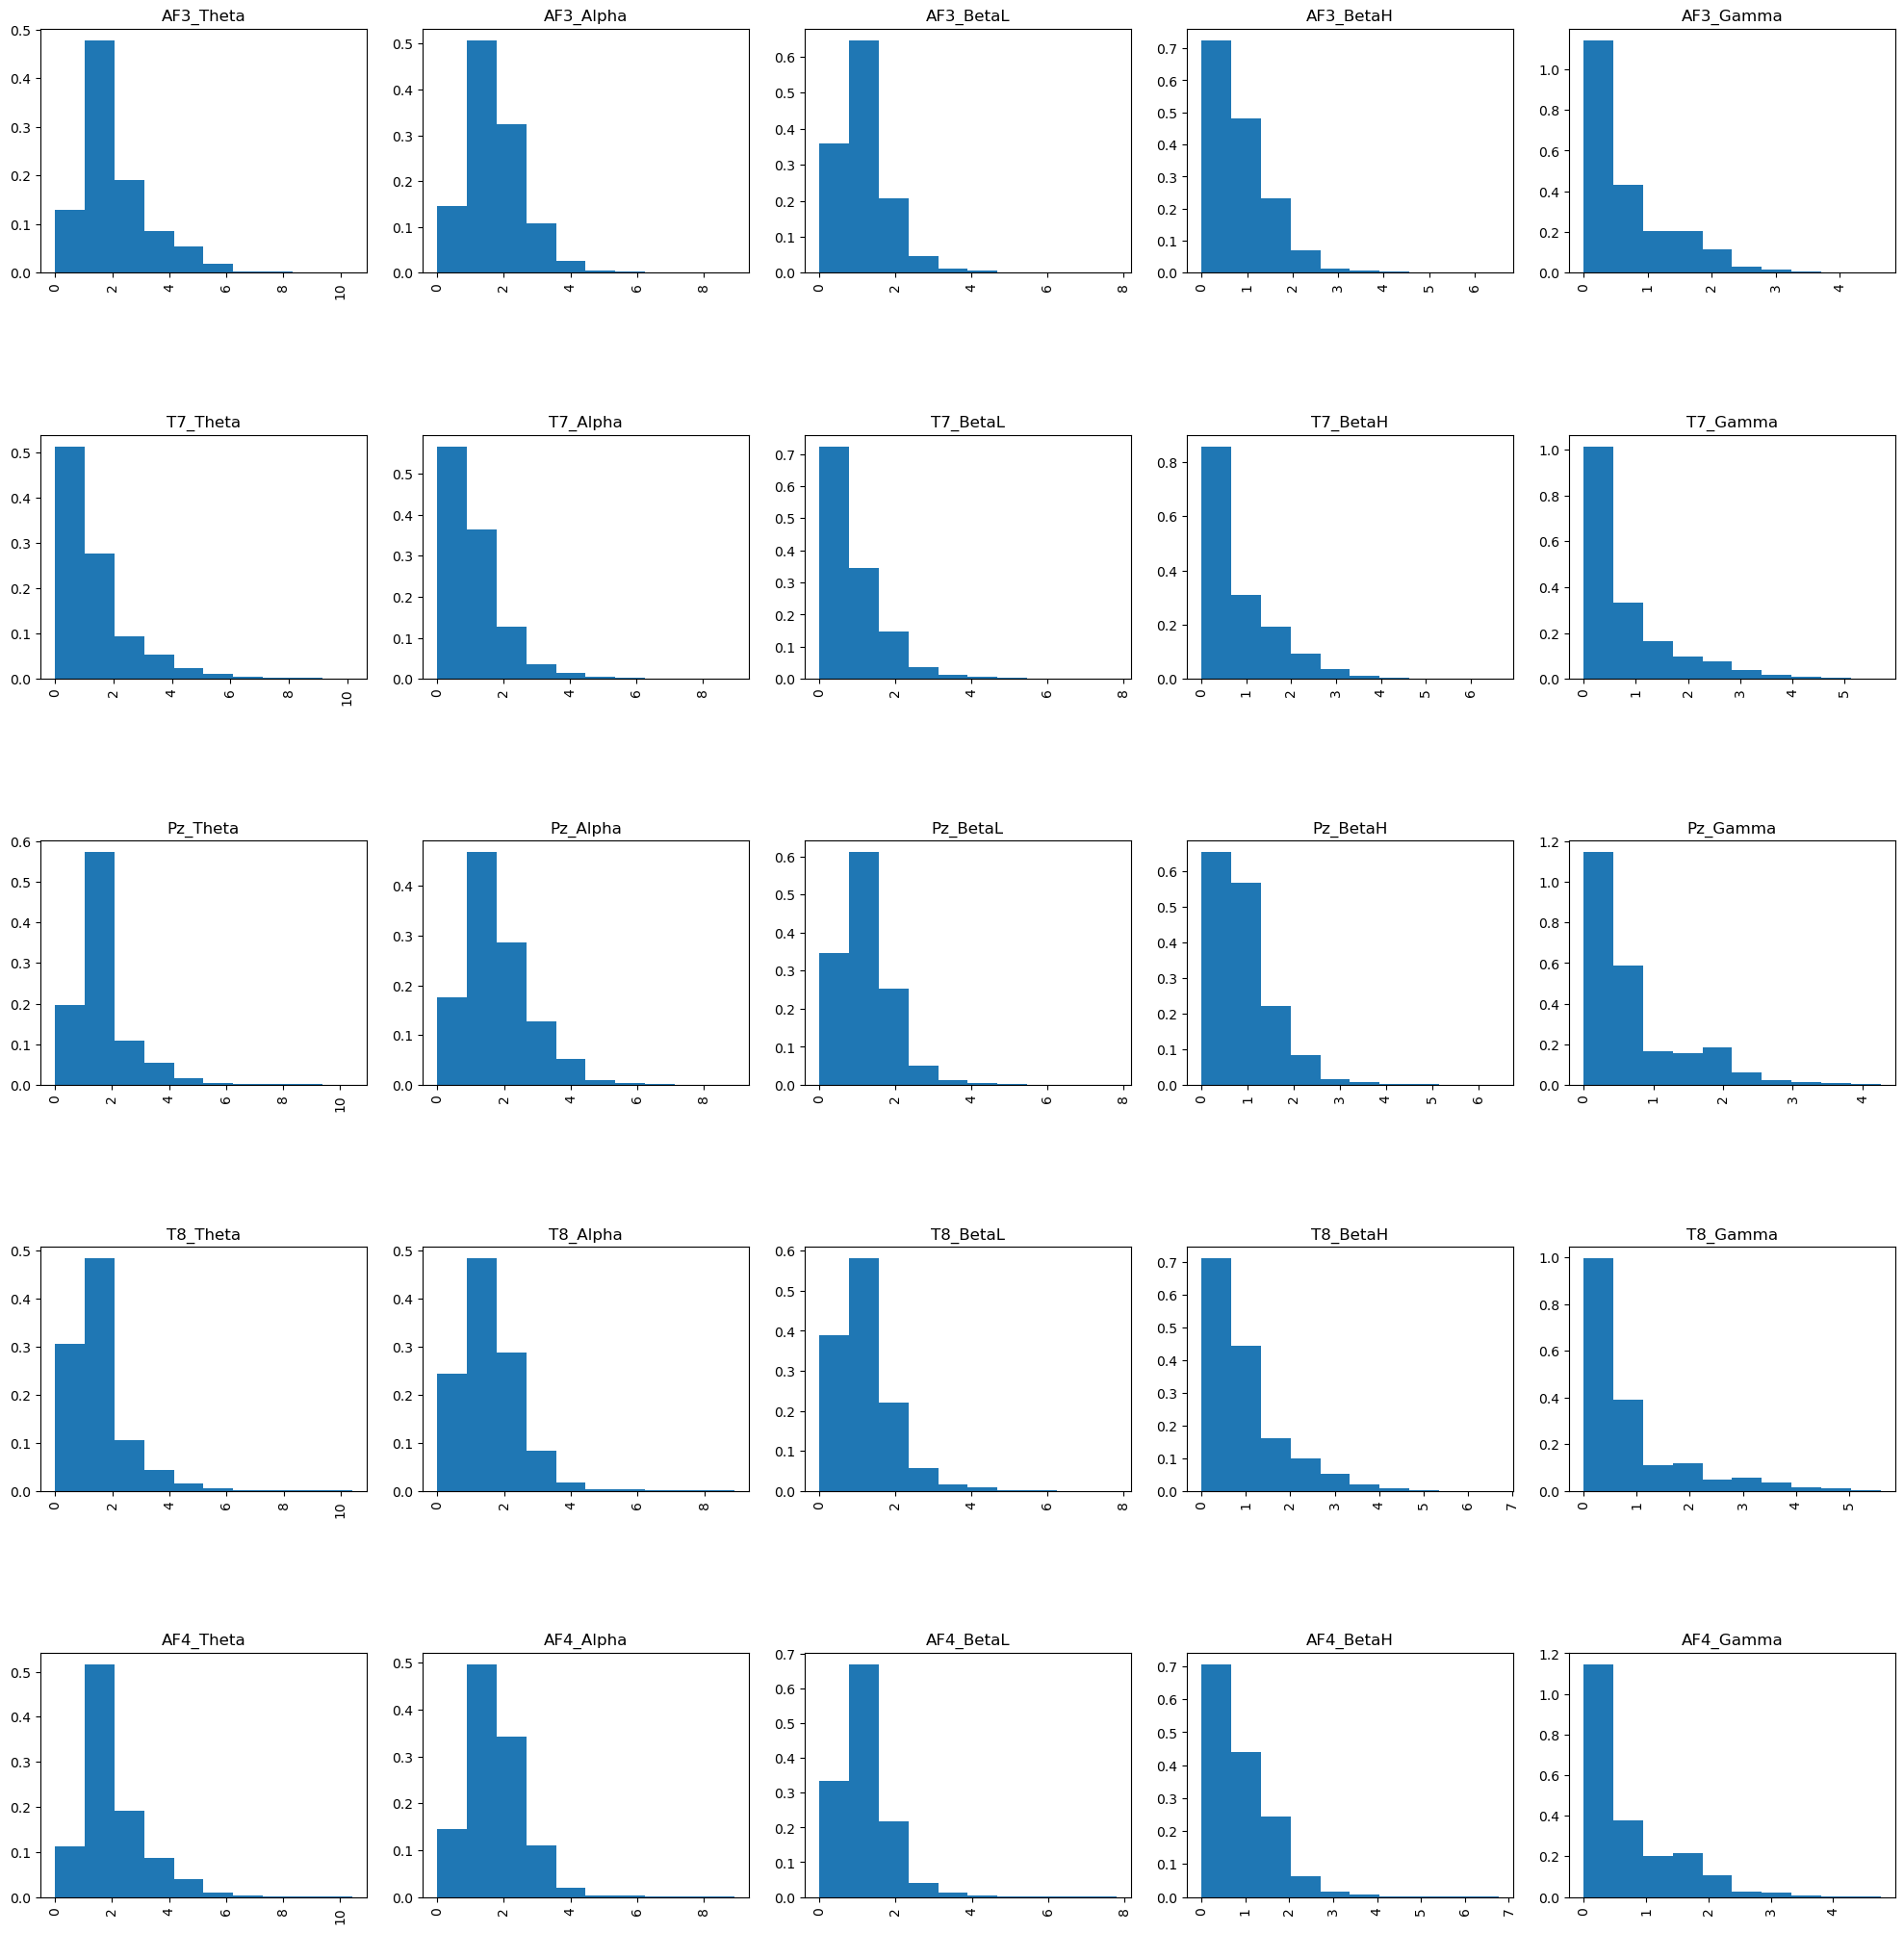

In [12]:
fig, axes = plt.subplots(5, 5,figsize=[20,20])
axes = axes.flatten()
fig.tight_layout(h_pad=10)

i=0
for x in pow_transformed.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist(pow_transformed[x],density=True)
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.title(x)
    i+=1
plt.show()

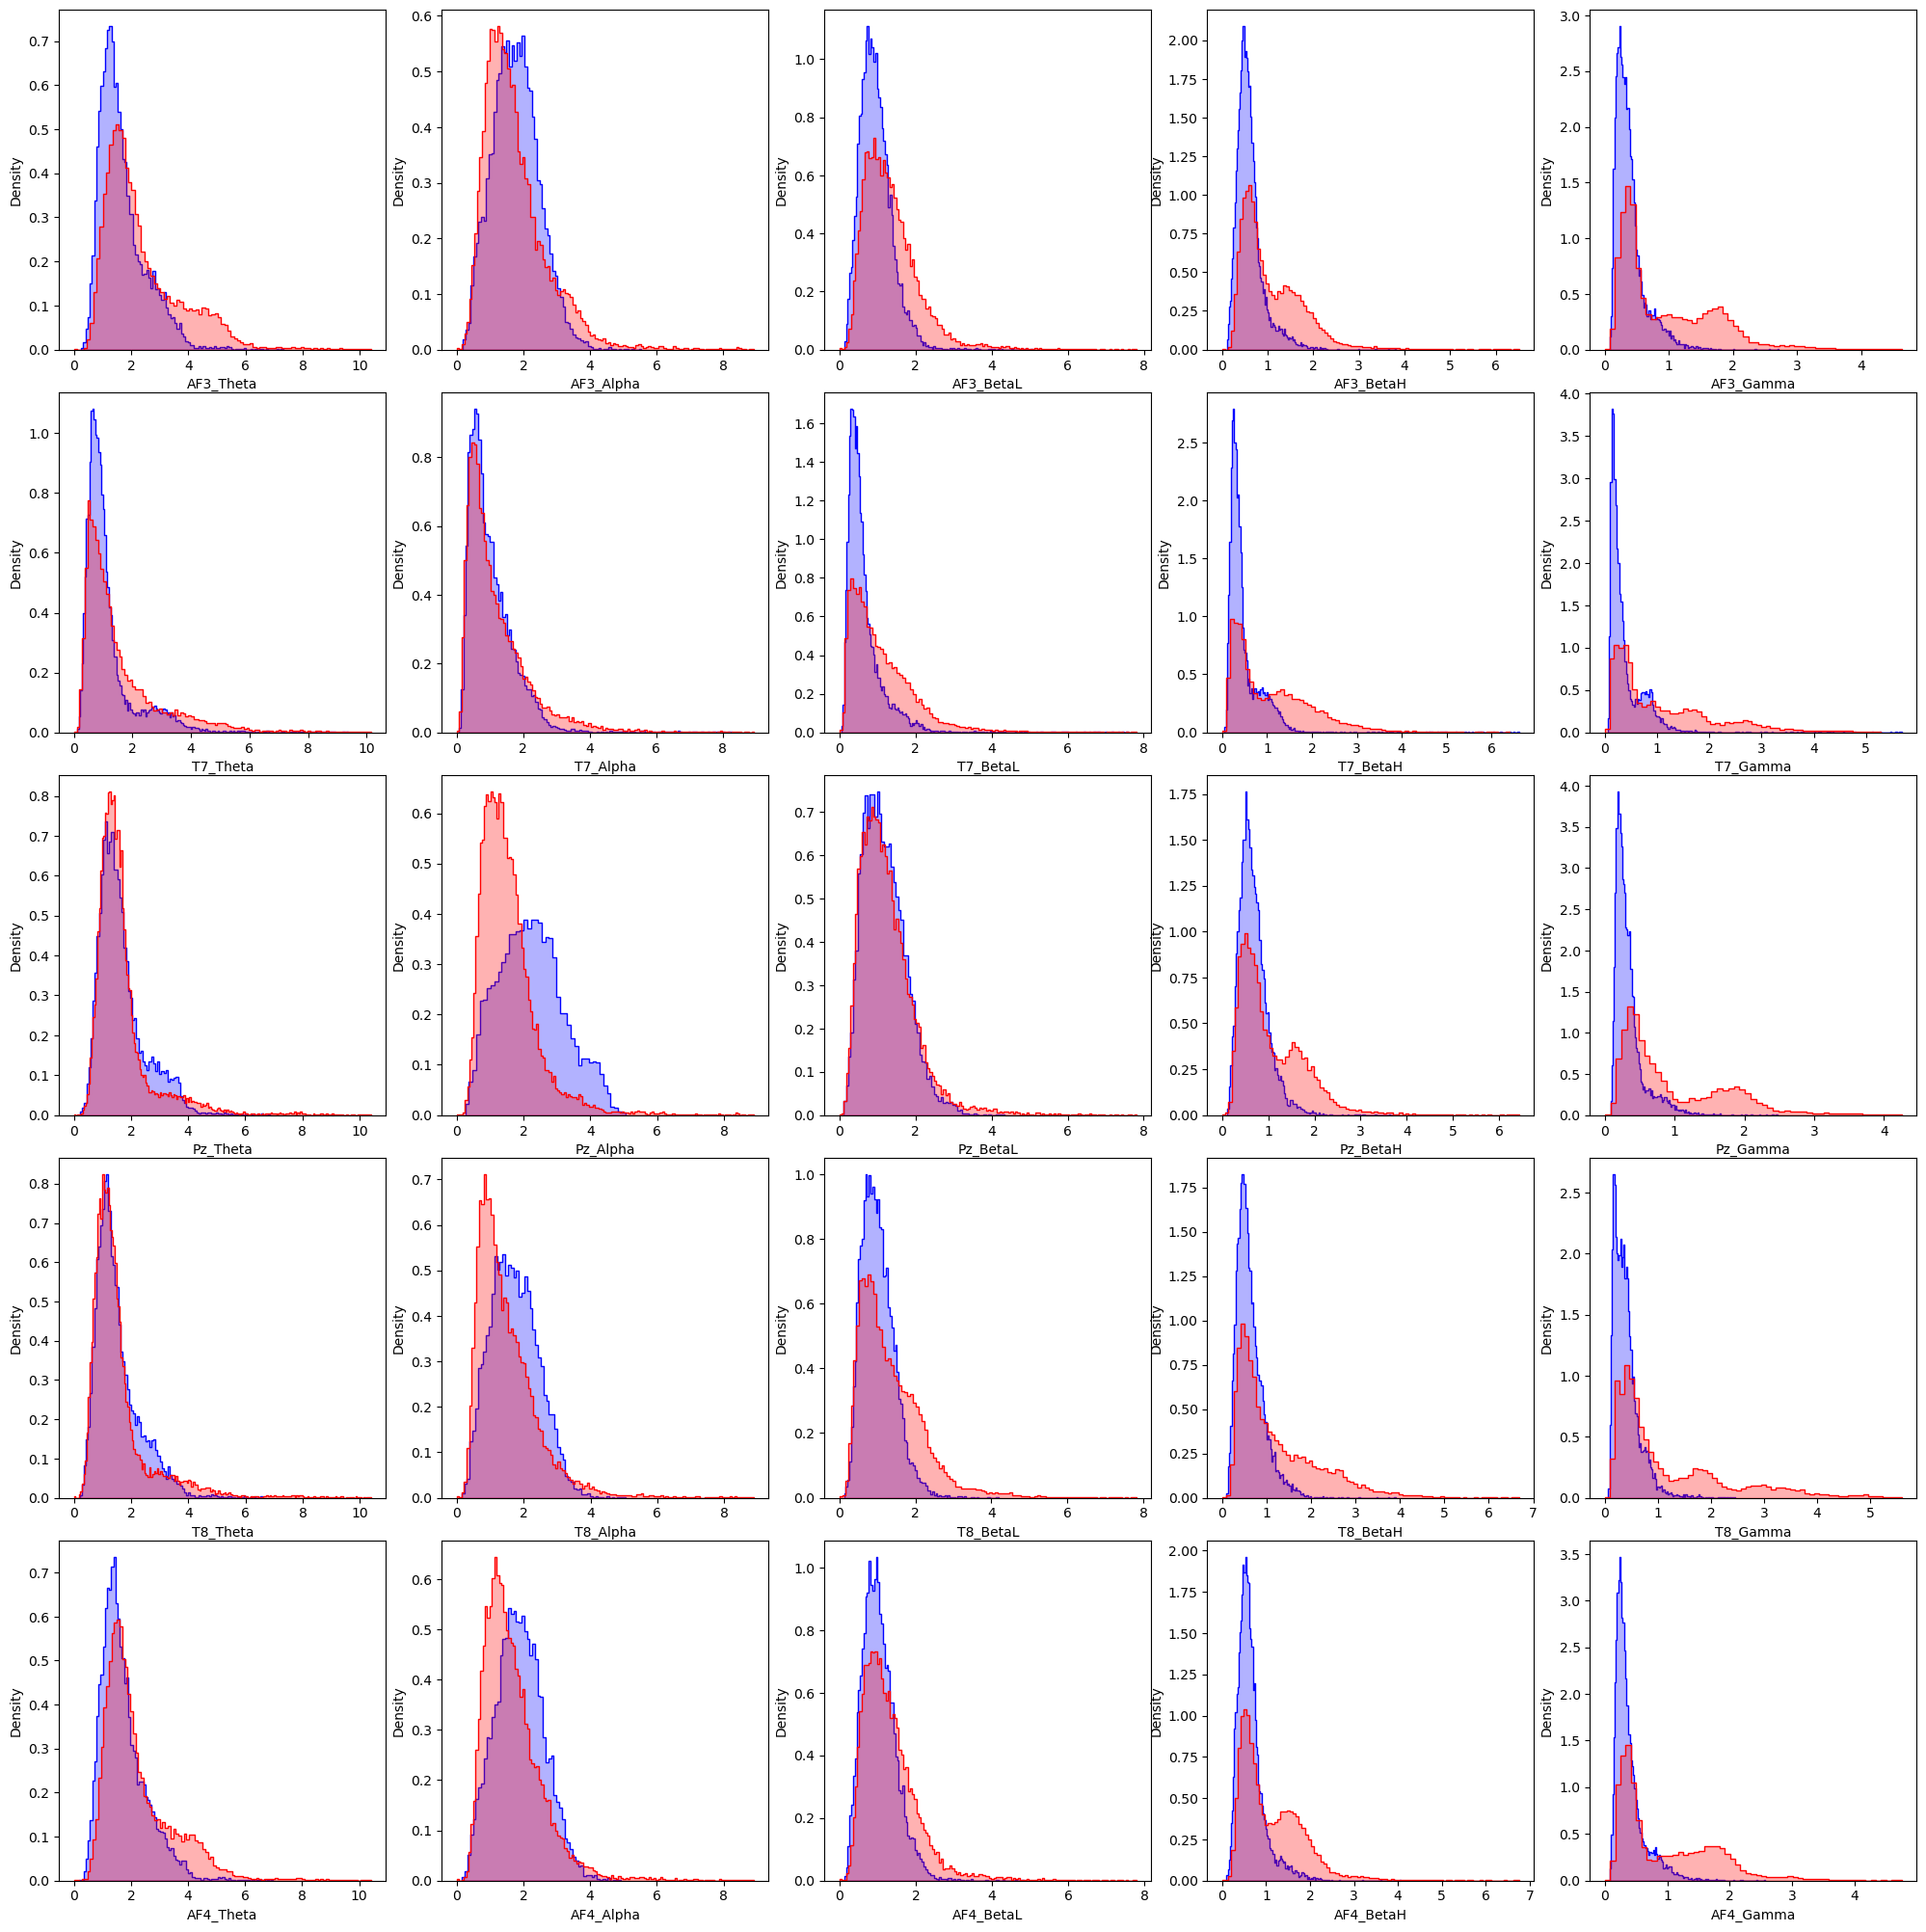

In [13]:
X0 = pow_transformed[filtered_df['Phase']=='baseline occhi chiusi']
X1 = pow_transformed[filtered_df['Phase']=='sudoku']

fig, axes = plt.subplots(ncols=5, nrows=5, figsize=(20,20))
fig.tight_layout()

for i, ax in zip(range(pow.columns.size), axes.flat):
    sns.histplot(X0.iloc[:,i], color="blue", ax=ax, stat='density', element="step",  alpha=0.3)
    sns.histplot(X1.iloc[:,i], color="red",  ax=ax,stat='density', element="step",  alpha=0.3)
plt.show()


# Classification 

In [14]:
X = pow_transformed.copy()  # Make a copy to avoid modifying the original DataFrame
print(X.shape)
y = (filtered_df['Phase'] == 'sudoku').astype(int)
print(len(y))

(38279, 25)
38279


In [15]:
X.tail()

,AF3_Theta,AF3_Alpha,AF3_BetaL,AF3_BetaH,AF3_Gamma,T7_Theta,T7_Alpha,T7_BetaL,T7_BetaH,T7_Gamma,...,T8_Theta,T8_Alpha,T8_BetaL,T8_BetaH,T8_Gamma,AF4_Theta,AF4_Alpha,AF4_BetaL,AF4_BetaH,AF4_Gamma
38274,0.590561,0.743840,0.473747,0.368801,0.156149,0.297137,0.517603,0.378436,0.161268,0.169743,...,0.610309,0.454255,0.554460,0.446607,0.239804,0.939226,0.686626,0.396088,0.285931,0.192272
38275,0.640274,0.733329,0.463734,0.372942,0.165514,0.301585,0.556755,0.381172,0.156149,0.168054,...,0.588897,0.327143,0.527093,0.440189,0.231905,1.029619,0.711478,0.401457,0.304539,0.199670
38276,0.738121,0.709513,0.447247,0.366031,0.172271,0.314811,0.582216,0.390690,0.160417,0.162969,...,0.585005,0.224742,0.495915,0.416075,0.223144,1.122329,0.711969,0.415415,0.316270,0.203757
38277,0.842859,0.644482,0.427879,0.351361,0.173113,0.331460,0.581098,0.407463,0.174793,0.155293,...,0.607589,0.164667,0.461845,0.381172,0.218332,1.219058,0.678034,0.429832,0.320633,0.202941
38278,0.940788,0.553310,0.422650,0.338613,0.169743,0.356275,0.544067,0.422650,0.197210,0.148420,...,0.637634,0.157858,0.429832,0.352767,0.218332,1.311840,0.625404,0.453620,0.324978,0.198851


In [16]:
y.tail()

38274    1
38275    1
38276    1
38277    1
38278    1
Name: Phase, dtype: int32

In [17]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30,   
                                                    stratify=y,        #preserve target propotions (probviamo non stratificata)
                                                    random_state= 2)   #fix random seed for replicability

print( X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(26795, 25) (11484, 25) (26795,) (11484,)


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

#Funzioni


def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)
    print("\n")
    print("f1         train %.3f   test %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) ))  
    print("\n")
    print(confusion_matrix(y_test, y_pred))
    return ( f1_score(y_train, y_pred_train),f1_score(y_test, y_pred) )

def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.3f' % auc)
    return (fpr, tpr ,auc)

## Tree

In [19]:
#Tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth':          np.arange(5,10,1),
              'min_samples_split':  np.arange(5,50,1),
              'min_samples_leaf':   [2,4,6,7]}

tree_f1_train,tree_f1_test=hyperp_search(classifier,parameters)

Fitting 3 folds for each of 1800 candidates, totalling 5400 fits
f1_train: 0.939185 using {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 6}


f1         train 0.959   test 0.944


[[3973  475]
 [ 316 6720]]


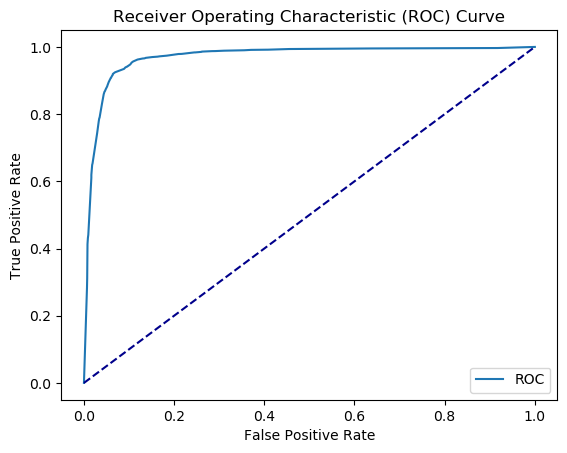

AUC: 0.969


(array([0.        , 0.0067446 , 0.00719424, 0.00786871, 0.00876799,
        0.00966727, 0.01641187, 0.01641187, 0.01641187, 0.01821043,
        0.01910971, 0.02922662, 0.03282374, 0.03394784, 0.0346223 ,
        0.04001799, 0.04383993, 0.04563849, 0.04676259, 0.04721223,
        0.04833633, 0.05148381, 0.05215827, 0.05485612, 0.0580036 ,
        0.0591277 , 0.05935252, 0.05980216, 0.0625    , 0.06339928,
        0.06384892, 0.06407374, 0.06901978, 0.08902878, 0.0915018 ,
        0.09195144, 0.09419964, 0.09577338, 0.09644784, 0.09644784,
        0.10229317, 0.10319245, 0.10566547, 0.10903777, 0.11892986,
        0.1294964 , 0.13084532, 0.13107014, 0.13241906, 0.13286871,
        0.13444245, 0.13714029, 0.13871403, 0.1517536 , 0.1629946 ,
        0.16794065, 0.18367806, 0.20998201, 0.21065647, 0.21178058,
        0.21695144, 0.24482914, 0.24685252, 0.25427158, 0.26079137,
        0.26146583, 0.28439748, 0.29114209, 0.31047662, 0.35544065,
        0.3705036 , 0.40535072, 0.40759892, 0.45

In [20]:
model = DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_leaf=4, min_samples_split=5)

roc(model,X_train,y_train,X_test,y_test)

In [21]:
 from sklearn.ensemble import RandomForestClassifier


classifier= RandomForestClassifier()
parameters = {'n_estimators' :     [8,10,100],
              'criterion' :        ['entropy', 'gini'],
              'max_depth' :        np.arange(5,10,1), 
              'min_samples_split': np.arange(5,10,1),
              'min_samples_leaf' : [2,4,6,8,]
             };


RF_f1_train,RF_f1_test=hyperp_search(classifier,parameters)

Fitting 3 folds for each of 600 candidates, totalling 1800 fits
f1_train: 0.961617 using {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 100}


f1         train 0.976   test 0.964


[[4153  295]
 [ 215 6821]]


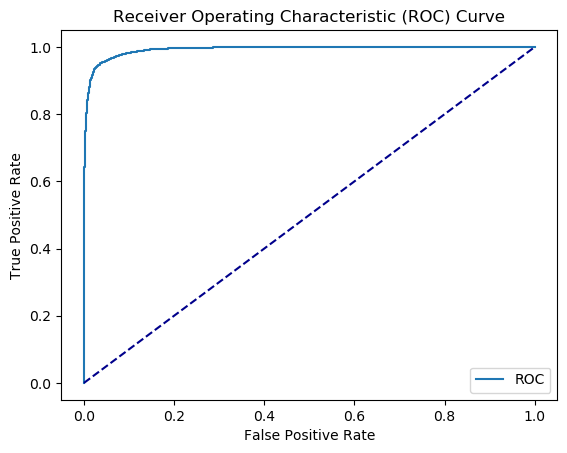

AUC: 0.992


(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [22]:
model = RandomForestClassifier(criterion='gini', max_depth=9, min_samples_leaf=2, min_samples_split=8, n_estimators=100)

roc(model,X_train,y_train,X_test,y_test)